In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad("./data/adata_v1.h5ad")

In [5]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("Mt-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("Rps", "Rpl"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^Hb[^(p)]")

In [6]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

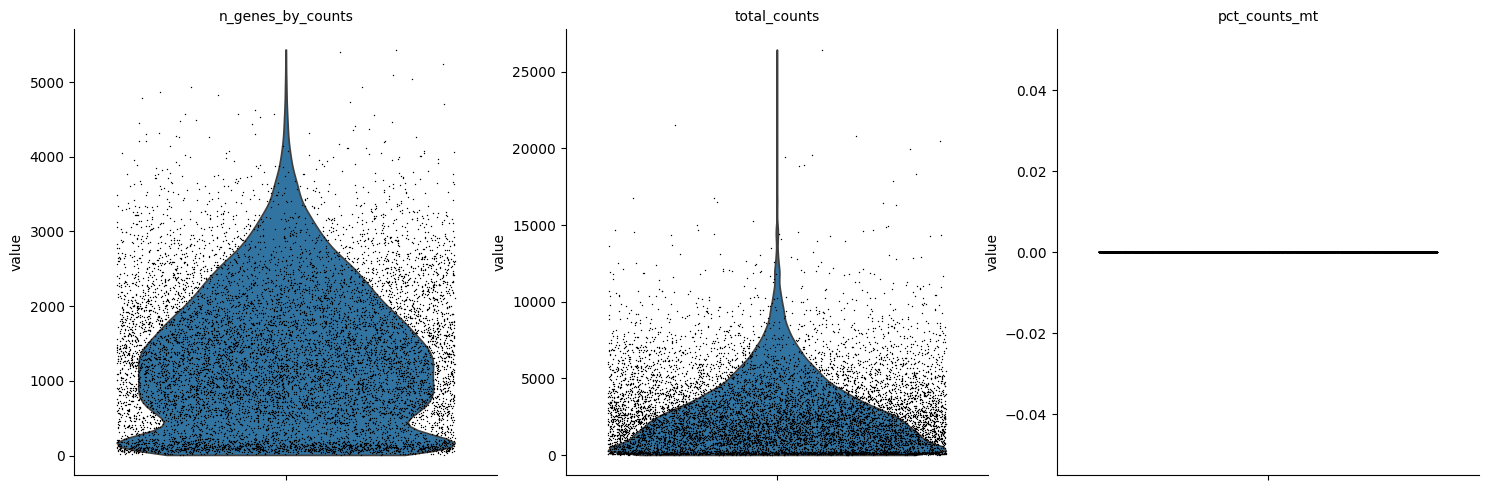

In [7]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

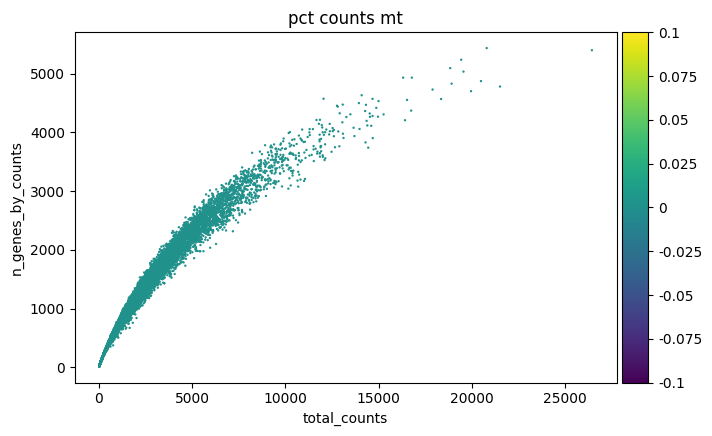

In [8]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [9]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [10]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [11]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [12]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

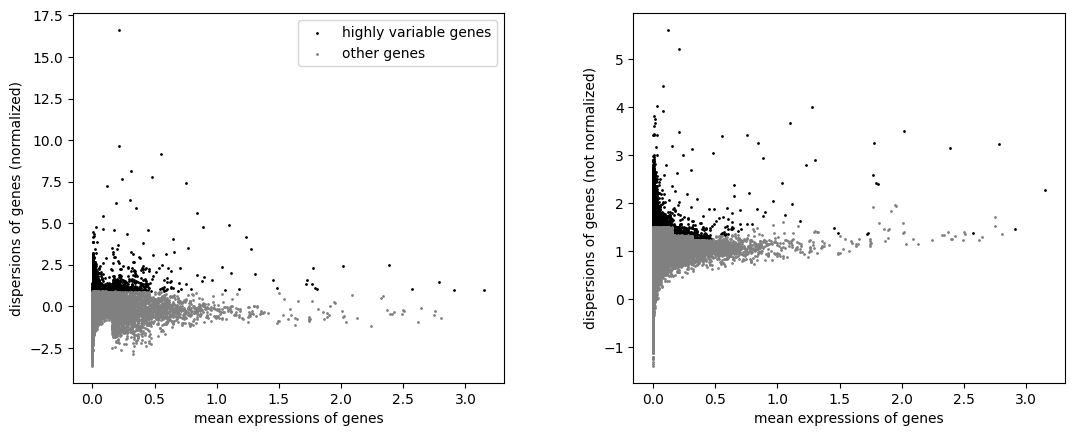

In [13]:
sc.pl.highly_variable_genes(adata)

In [14]:
adata

AnnData object with n_obs × n_vars = 9735 × 14263
    obs: 'Well_ID', 'Seq_batch_ID', 'Amp_batch_ID', 'well_coordinates', 'Mouse_ID', 'Plate_ID', 'Batch_desc', 'Pool_barcode', 'Cell_barcode', 'RMT_sequence', 'Number_of_cells', 'CD34_measurement', 'FcgR3_measurement', 'index', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [15]:
sc.tl.pca(adata)

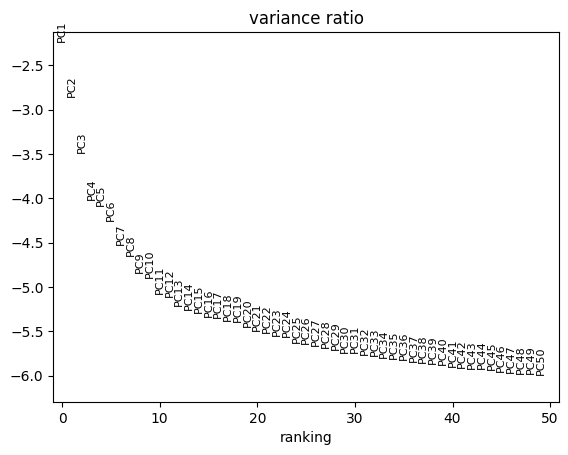

In [16]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

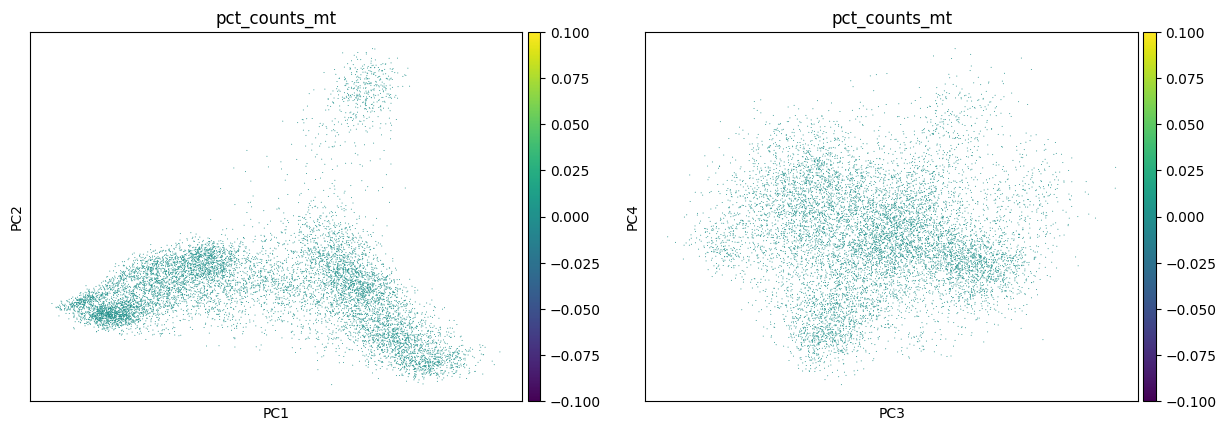

In [17]:
sc.pl.pca(
    adata,
    color=["pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3)],
    ncols=2,
    size=2,
)

In [18]:
sc.pp.neighbors(adata)

In [19]:
sc.tl.umap(adata)

/usr/local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


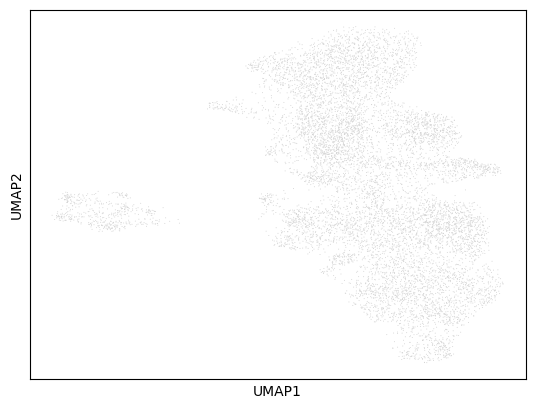

In [20]:
sc.pl.umap(
    adata,
    # Setting a smaller point size to get prevent overlap
    size=2,
)

In [21]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, n_iterations=2)

/usr/local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


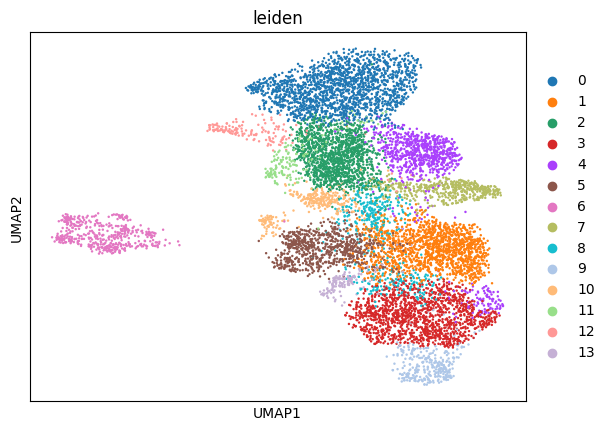

In [22]:
sc.pl.umap(adata, color=["leiden"])

In [23]:
sc.pp.recipe_zheng17(adata)

In [24]:
sc.tl.pca(adata, svd_solver="arpack")

In [25]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

/usr/local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


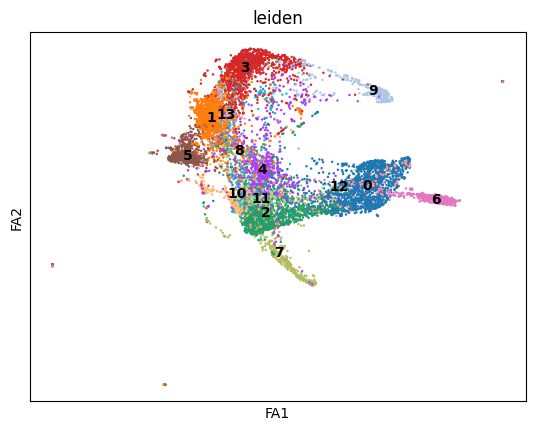

In [26]:
sc.pl.draw_graph(adata, color="leiden", legend_loc="on data")

In [17]:
adata = sc.datasets.paul15()

/usr/local/lib/python3.8/site-packages/scanpy/datasets/_datasets.py:204: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['iroot'] = 840


In [29]:
adata = sc.read_h5ad("./data/adata.h5ad")

In [30]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("Mt-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("Rps", "Rpl"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^Hb[^(p)]")

In [31]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

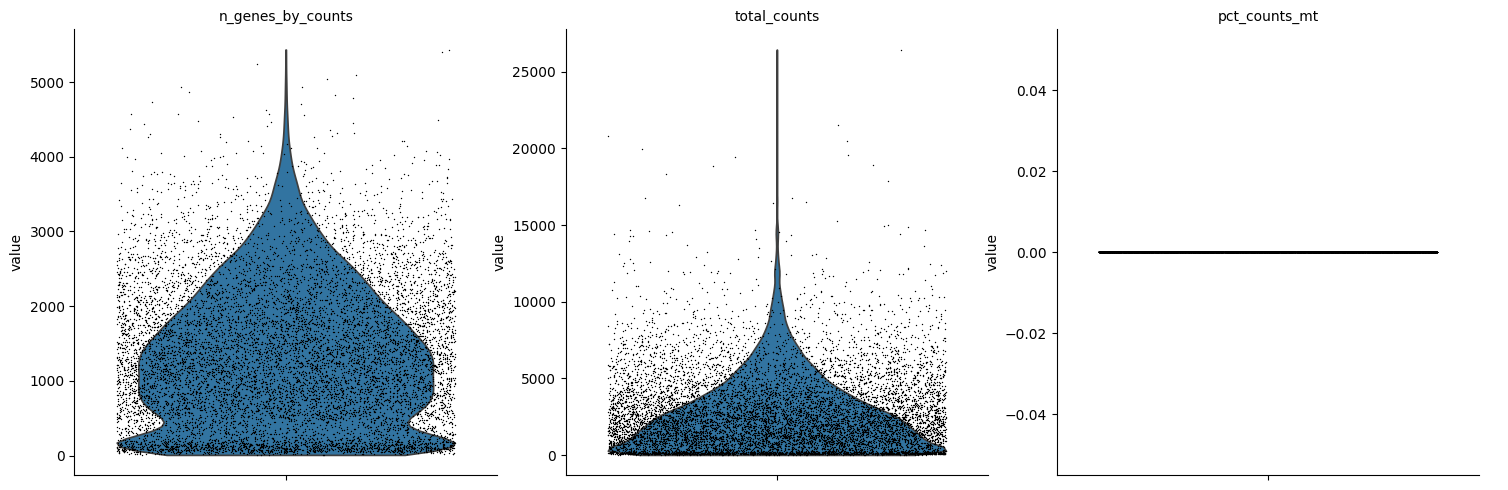

In [32]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

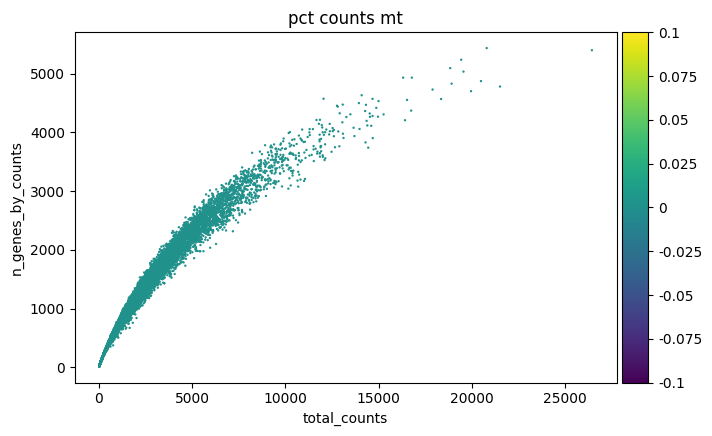

In [33]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [34]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [35]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [27]:
# this is not required and results will be comparable without it
#adata.X = adata.X.astype("float64")

In [36]:
sc.pp.recipe_zheng17(adata)

In [37]:
sc.tl.pca(adata, svd_solver="arpack")

In [38]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

/usr/local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


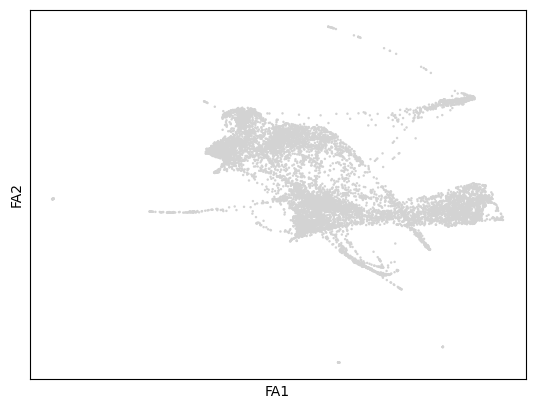

In [39]:
sc.pl.draw_graph(adata, 
                 #color="paul15_clusters",
                 legend_loc="on data")

In [40]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = "./write/paul15.h5ad"
# low dpi (dots per inch) yields small inline figures
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(4, 4), facecolor="white")

-----
anndata     0.9.2
scanpy      1.9.8
-----
PIL                         10.4.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.15.0
backcall                    0.2.0
certifi                     2024.07.04
cffi                        1.16.0
charset_normalizer          3.3.2
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.2
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.2
executing                   2.0.1
fa2                         NA
fastjsonschema              NA
fqdn                        NA
h5py                        3.11.0
idna                        3.7
igraph                      0.11.6
importlib_resources         NA
ipykernel                   6.29.5
ipy

/usr/local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


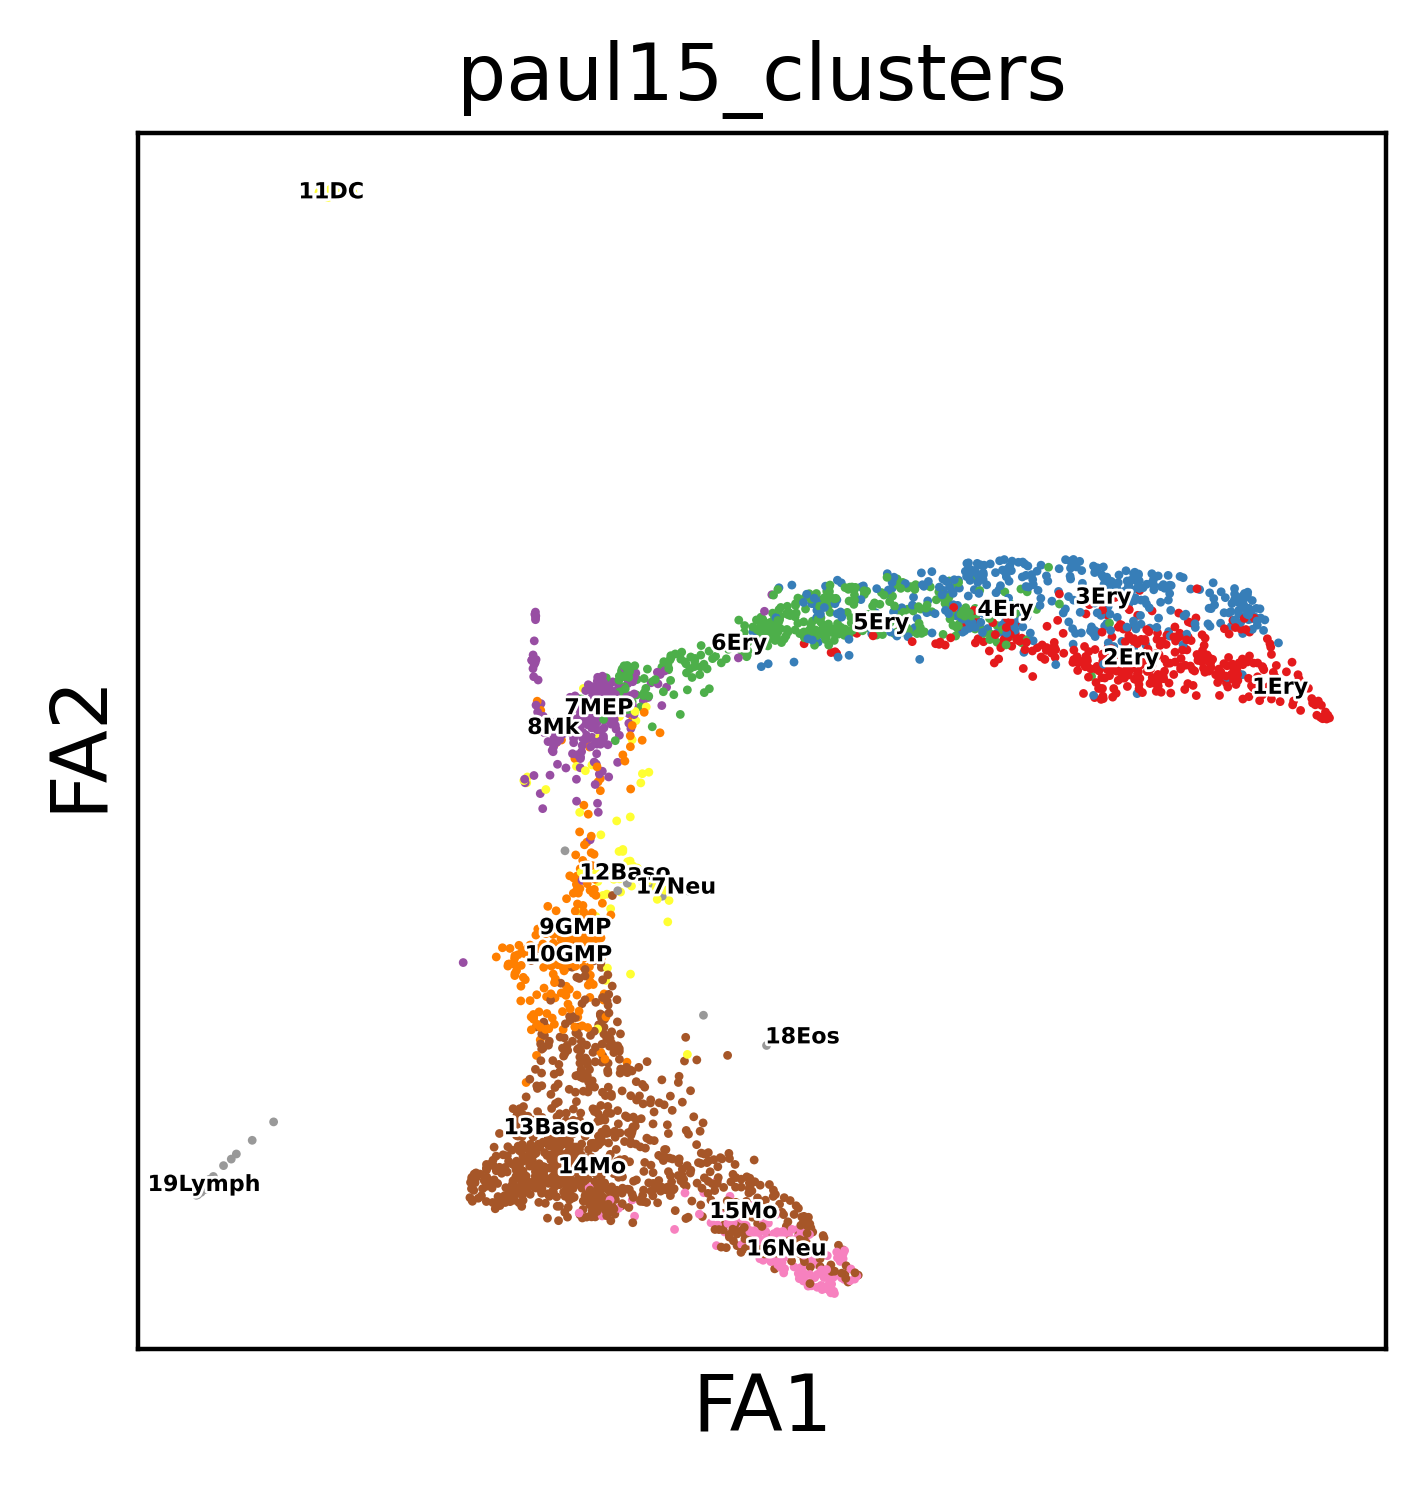

In [50]:
sc.pl.draw_graph(adata, 
                 color="paul15_clusters", 
                 legend_loc="on data",
                 legend_fontsize=4, 
                 legend_fontoutline=1,
                 size=10, 
                 #edge_color='gray', 
                 #edge_width=0.1, 
                 palette='Set1',
                 #title="Paul15 Clusters Graph"
                 #add_outline=True,
                 outline_width=0.5,
                 frameon=True
                )

In [15]:
adata.var

n_counts      mean       std
0910001L09Rik    1698.0  0.335684  0.474898
1100001G20Rik     185.0  0.033331  0.174144
1110013L07Rik     257.0  0.072798  0.267693
1190002H23Rik    1992.0  0.309177  0.492265
1300017J02Rik      58.0  0.010699  0.079495
...                 ...       ...       ...
Zyx              1240.0  0.305490  0.541076
calp80             77.0  0.023879  0.153760
mKIAA0569         922.0  0.188489  0.391455
mKIAA1575         725.0  0.157238  0.350394
slc43a2           172.0  0.044188  0.199336

[1000 rows x 3 columns]

In [16]:
adata.obs

paul15_clusters  n_counts_all
0               7MEP         353.0
1               15Mo        2556.0
2               3Ery        4649.0
3               15Mo        4486.0
4               3Ery        5205.0
...              ...           ...
2725            2Ery        4873.0
2726          13Baso        3553.0
2727            7MEP         443.0
2728            15Mo        3252.0
2729            3Ery        6401.0

[2730 rows x 2 columns]

In [51]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_diffmap")

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.9989278  0.99671    0.99430376 0.98939794
     0.9883687  0.98731077 0.98398703 0.983007   0.9790806  0.9762548
     0.9744365  0.9729161  0.9652972 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:01)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [52]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:12)


/usr/local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


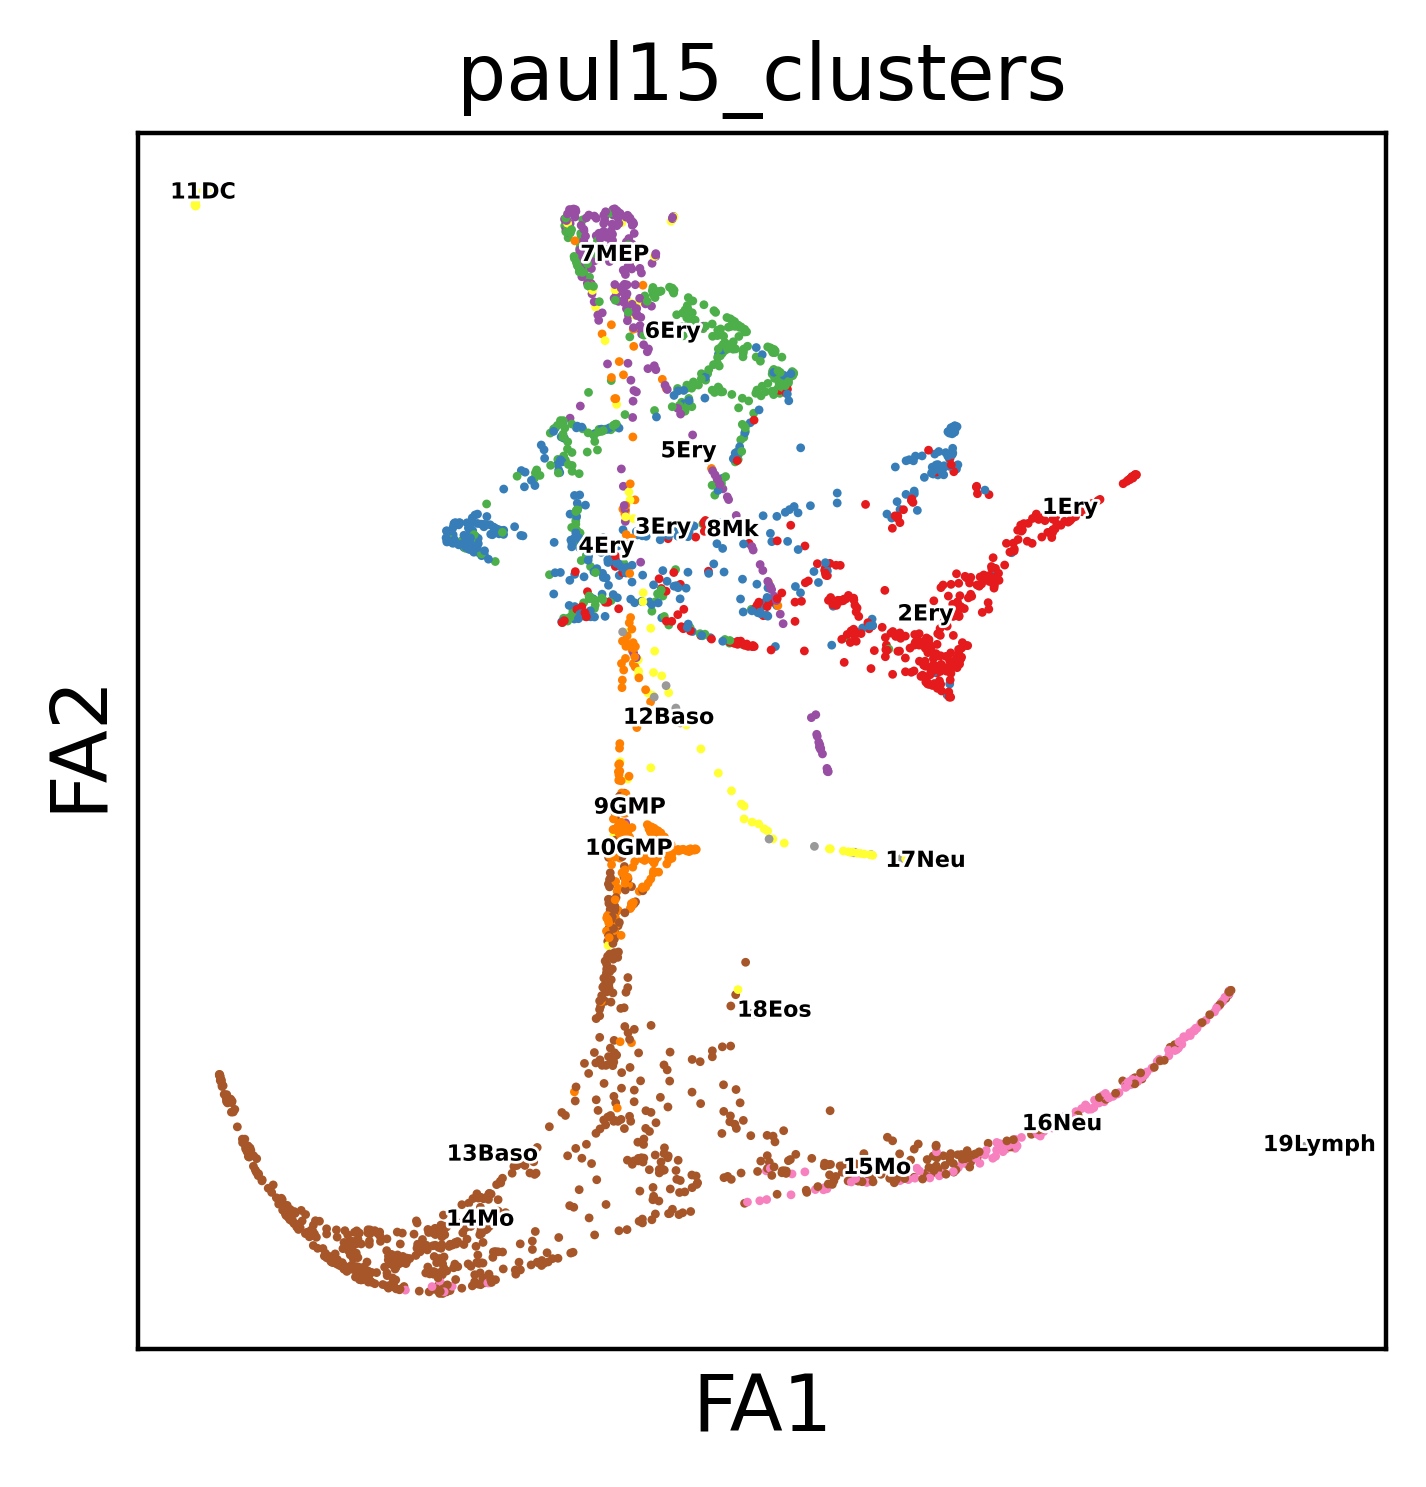

In [53]:
sc.pl.draw_graph(adata, 
                 color="paul15_clusters", 
                 legend_loc="on data",
                 legend_fontsize=4, 
                 legend_fontoutline=1,
                 size=10, 
                 #edge_color='gray', 
                 #edge_width=0.1, 
                 palette='Set1',
                 #title="Paul15 Clusters Graph"
                 #add_outline=True,
                 outline_width=0.5,
                 frameon=True
                )

In [41]:
sc.tl.louvain(adata, resolution=1.0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 35 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [42]:
sc.tl.paga(adata, groups="louvain")

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


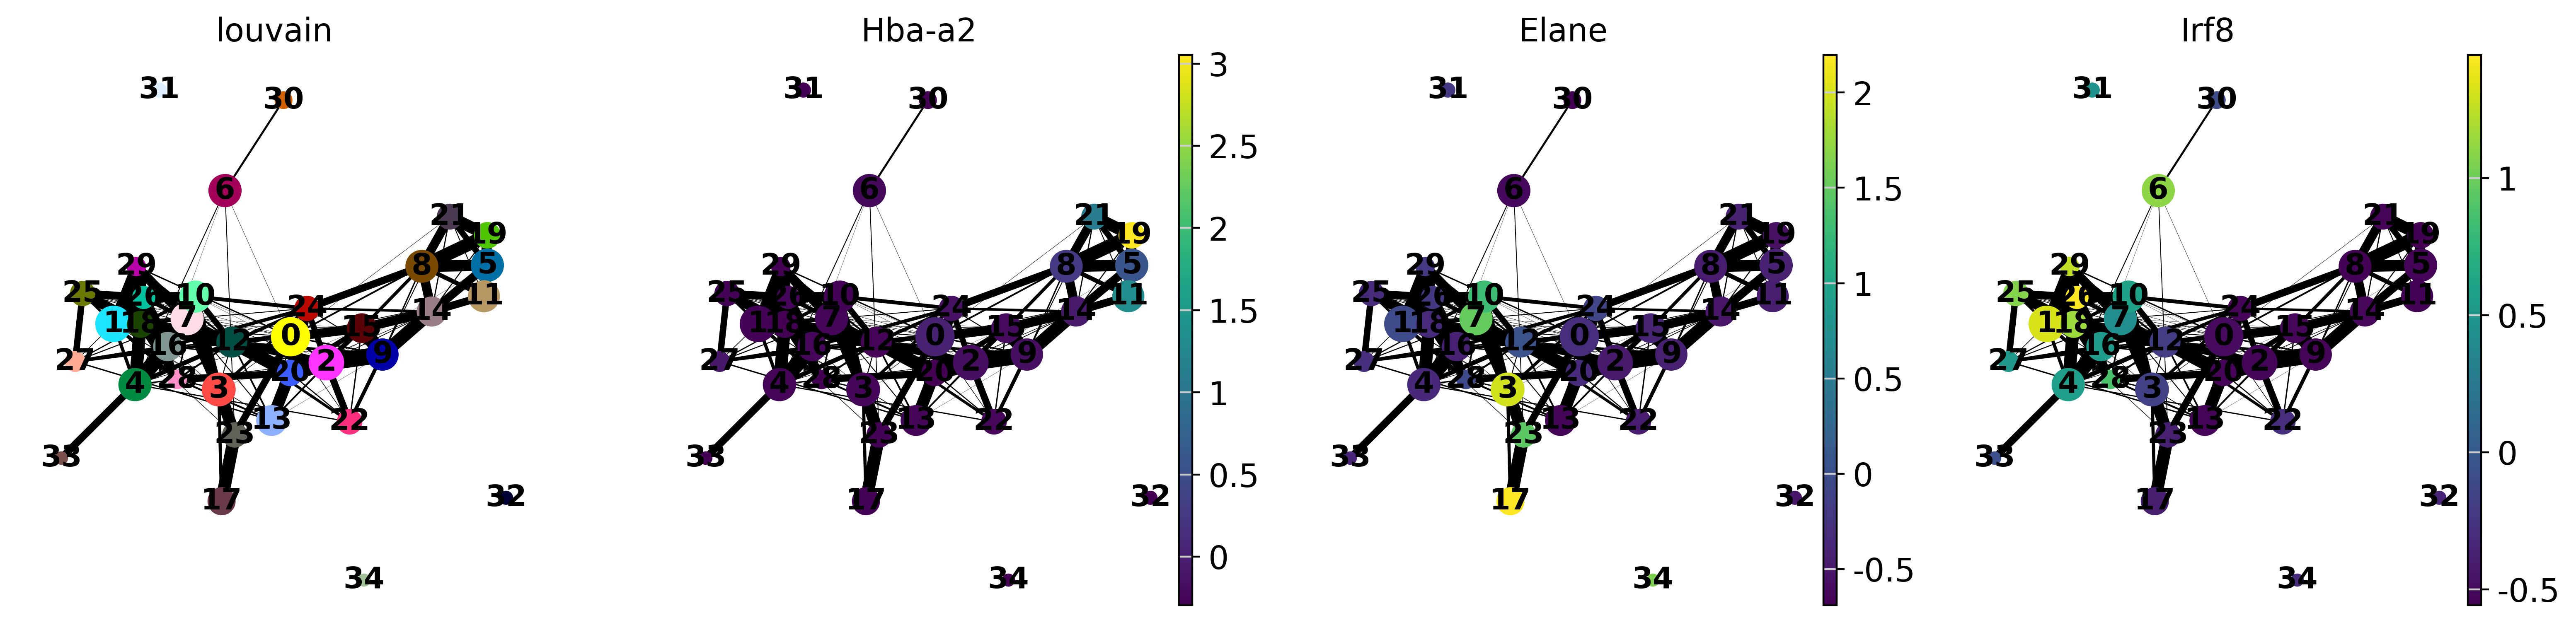

In [43]:
sc.pl.paga(adata, color=["louvain", "Hba-a2", "Elane", "Irf8"])

ValueError: Expected `colors` to be of length `35`, found `6`.

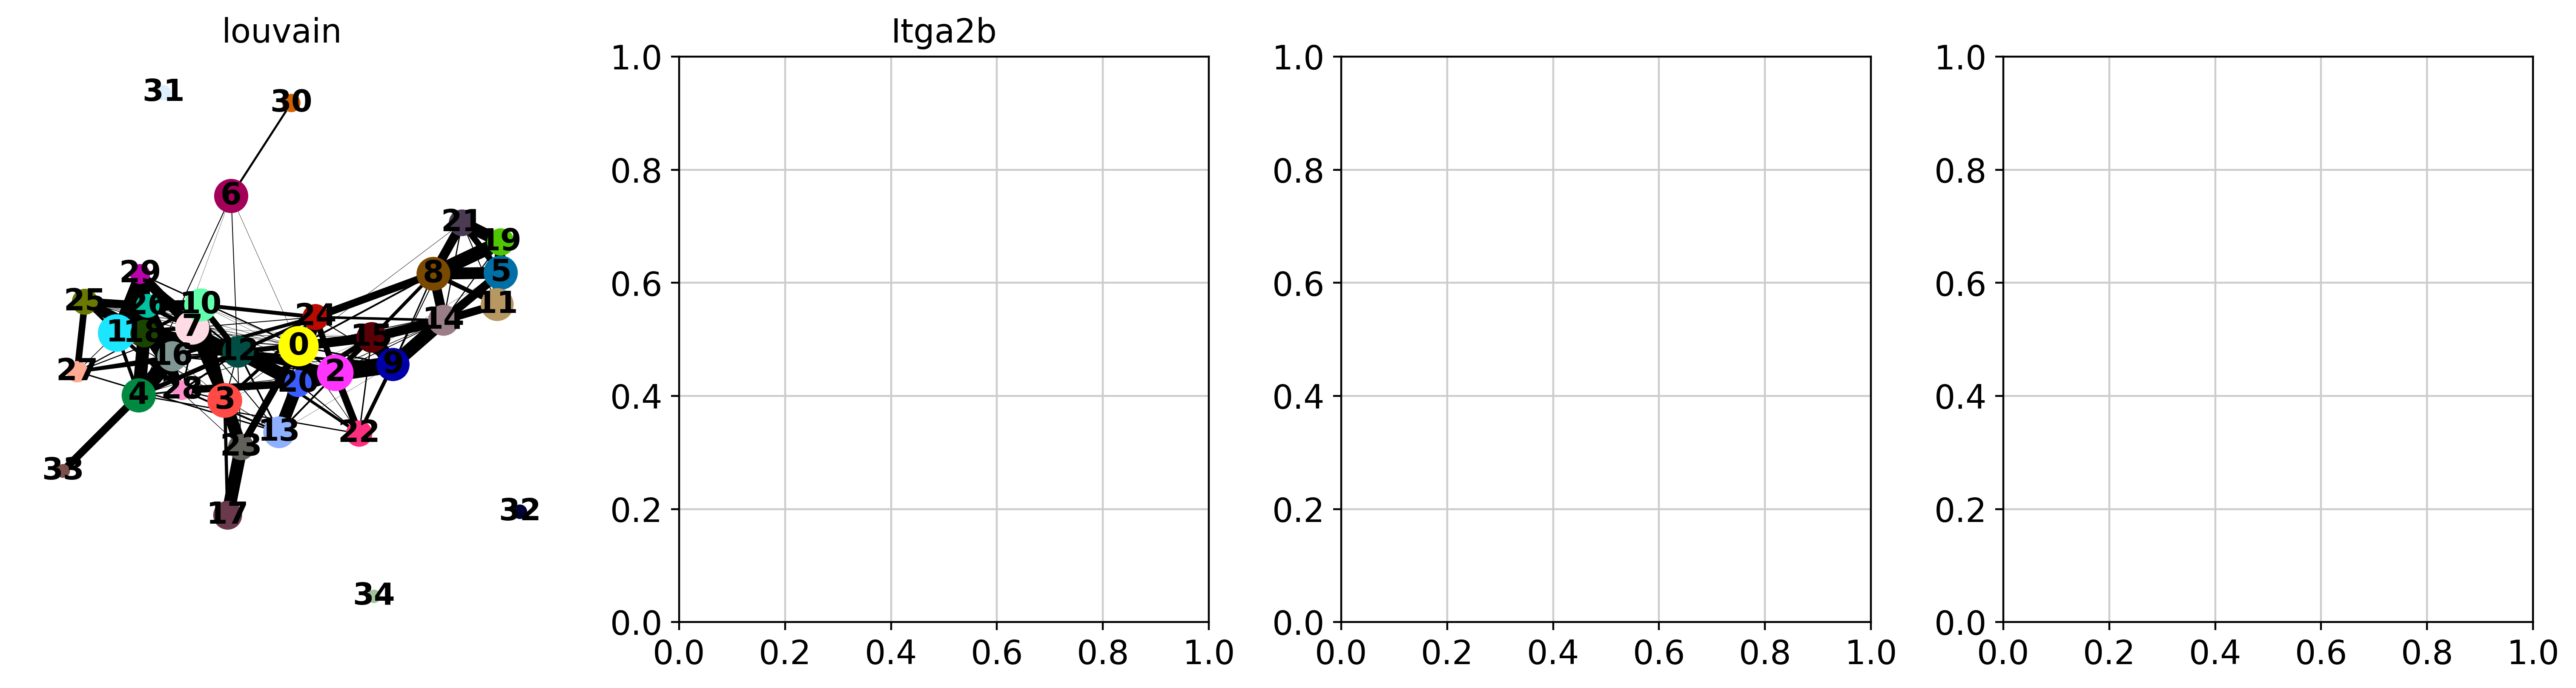

In [44]:
sc.pl.paga(adata, color=["louvain", "Itga2b", "Prss34", "Cma1"])

In [45]:
adata.obs["louvain"].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34'],
      dtype='object')

In [46]:
adata.obs["louvain_anno"] = adata.obs["louvain"]

In [47]:
adata.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
W29953                215                 5.375278           229   
W29954               1393                 7.239933          2258   
W29955                148                 5.003946           156   
W29956               1473                 7.295735          2420   
W29957               2646                 7.881182          5896   
...                   ...                      ...           ...   
W76330                101                 4.624973           114   
W76331               1083                 6.988413          2048   
W76332               1383                 7.232733          2953   
W76333               1741                 7.462789          4128   
W76335                212                 5.361292           245   

        log1p_total_counts  pct_counts_in_top_50_genes  \
W29953            5.438079                   27.947598   
W29954            7.722678                   19.397697   
W29955            5.056246                   37.179487   
W29956            7.791936                   20.537190   
W29957            8.682199                   20.420624   
...                    ...                         ...   
W76330            4.744932                   55.263158   
W76331            7.625107                   24.804688   
W76332            7.990915                   26.244497   
W76333            8.325791                   25.944767   
W76335            5.505332                   33.877551   

        pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
W29953                    49.781659                    93.449782   
W29954                    27.679362                    39.149690   
W29955                    69.230769                   100.000000   
W29956                    28.595041                    38.966942   
W29957                    27.900271                    37.177748   
...                             ...                          ...   
W76330                    99.122807                   100.000000   
W76331                    35.498047                    48.291016   
W76332                    35.523197                    47.273959   
W76333                    34.520349                    45.906008   
W76335                    54.285714                    95.102041   

        pct_counts_in_top_500_genes  total_counts_mt  log1p_total_counts_mt  \
W29953                   100.000000                0                    0.0   
W29954                    60.451727                0                    0.0   
W29955                   100.000000                0                    0.0   
W29956                    59.793388                0                    0.0   
W29957                    53.968792                0                    0.0   
...                             ...              ...                    ...   
W76330                   100.000000                0                    0.0   
W76331                    71.533203                0                    0.0   
W76332                    69.556383                0                    0.0   
W76333                    64.995155                0                    0.0   
W76335                   100.000000                0                    0.0   

        ...  total_counts_ribo  log1p_total_counts_ribo  pct_counts_ribo  \
W29953  ...                 18                 2.944439         7.860262   
W29954  ...                288                 5.666427        12.754650   
W29955  ...                 10                 2.397895         6.410256   
W29956  ...                288                 5.666427        11.900826   
W29957  ...                752                 6.624065        12.754410   
...     ...                ...                      ...              ...   
W76330  ...                 13                 2.639057        11.403509   
W76331  ...                260                 5.564520        12.695312   
W76332  ...                459              

In [92]:
# Define the new categories list
new_categories = [
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
    "10/Ery", "11", "12", "13", "14", "15",
    "16/Stem", "17", "18",
    "19/Neu", "20/Mk", "21",
    "22/Baso", "23", "24/Mo"
]

# Check if the length matches
if len(new_categories) == len(adata.obs["louvain_anno"].cat.categories):
    # Assign the new categories
    adata.obs["louvain_anno"].cat.rename_categories(new_categories)
    print("New categories assigned successfully!")
else:
    print(f"Length mismatch: {len(new_categories)} new categories vs {len(adata.obs['louvain_anno'].cat.categories)} existing categories")
    # Optionally, print the categories for debugging
    print("New categories:", new_categories)

New categories assigned successfully!


In [48]:
sc.tl.paga(adata, groups="louvain_anno")

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


<Axes: >

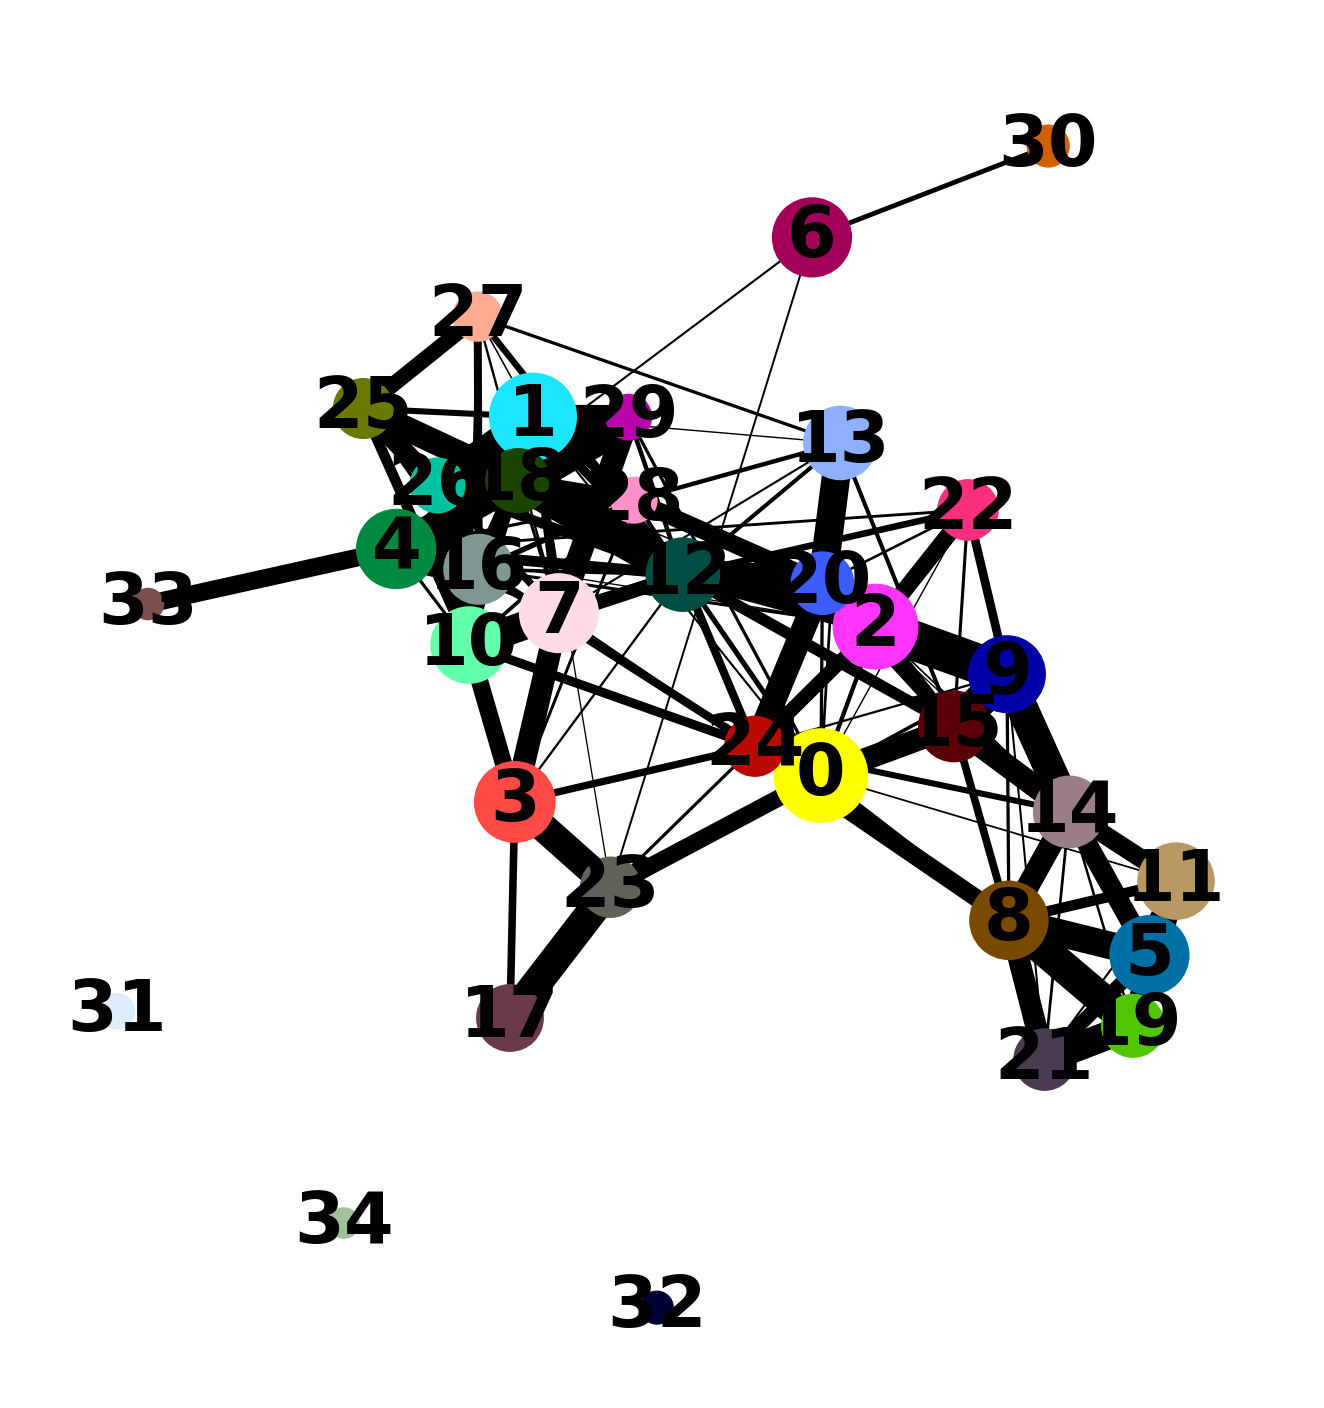

In [49]:
sc.pl.paga(adata, threshold=0.03, show=False)

In [50]:
sc.tl.draw_graph(adata, init_pos="paga")

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:03)


/usr/local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


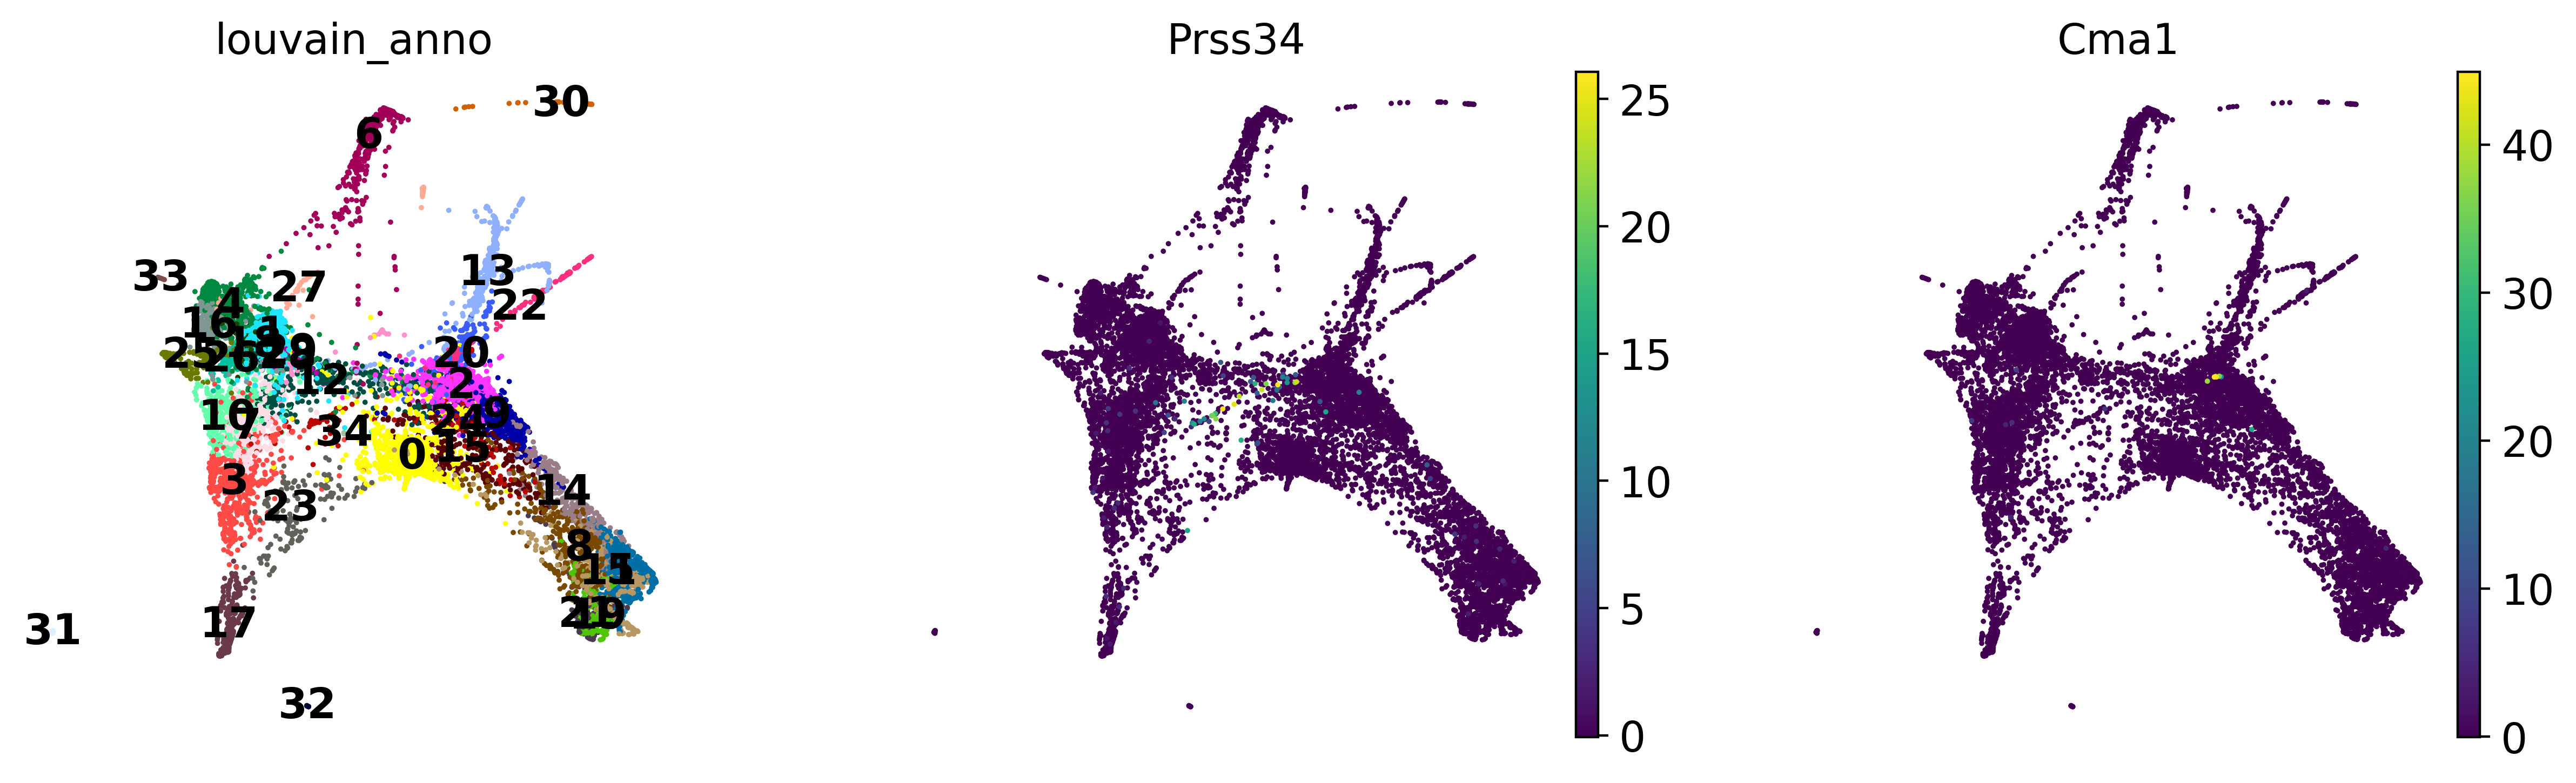

In [52]:
sc.pl.draw_graph(
    adata, color=["louvain_anno", "Prss34", "Cma1"], legend_loc="on data"
)

/usr/local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


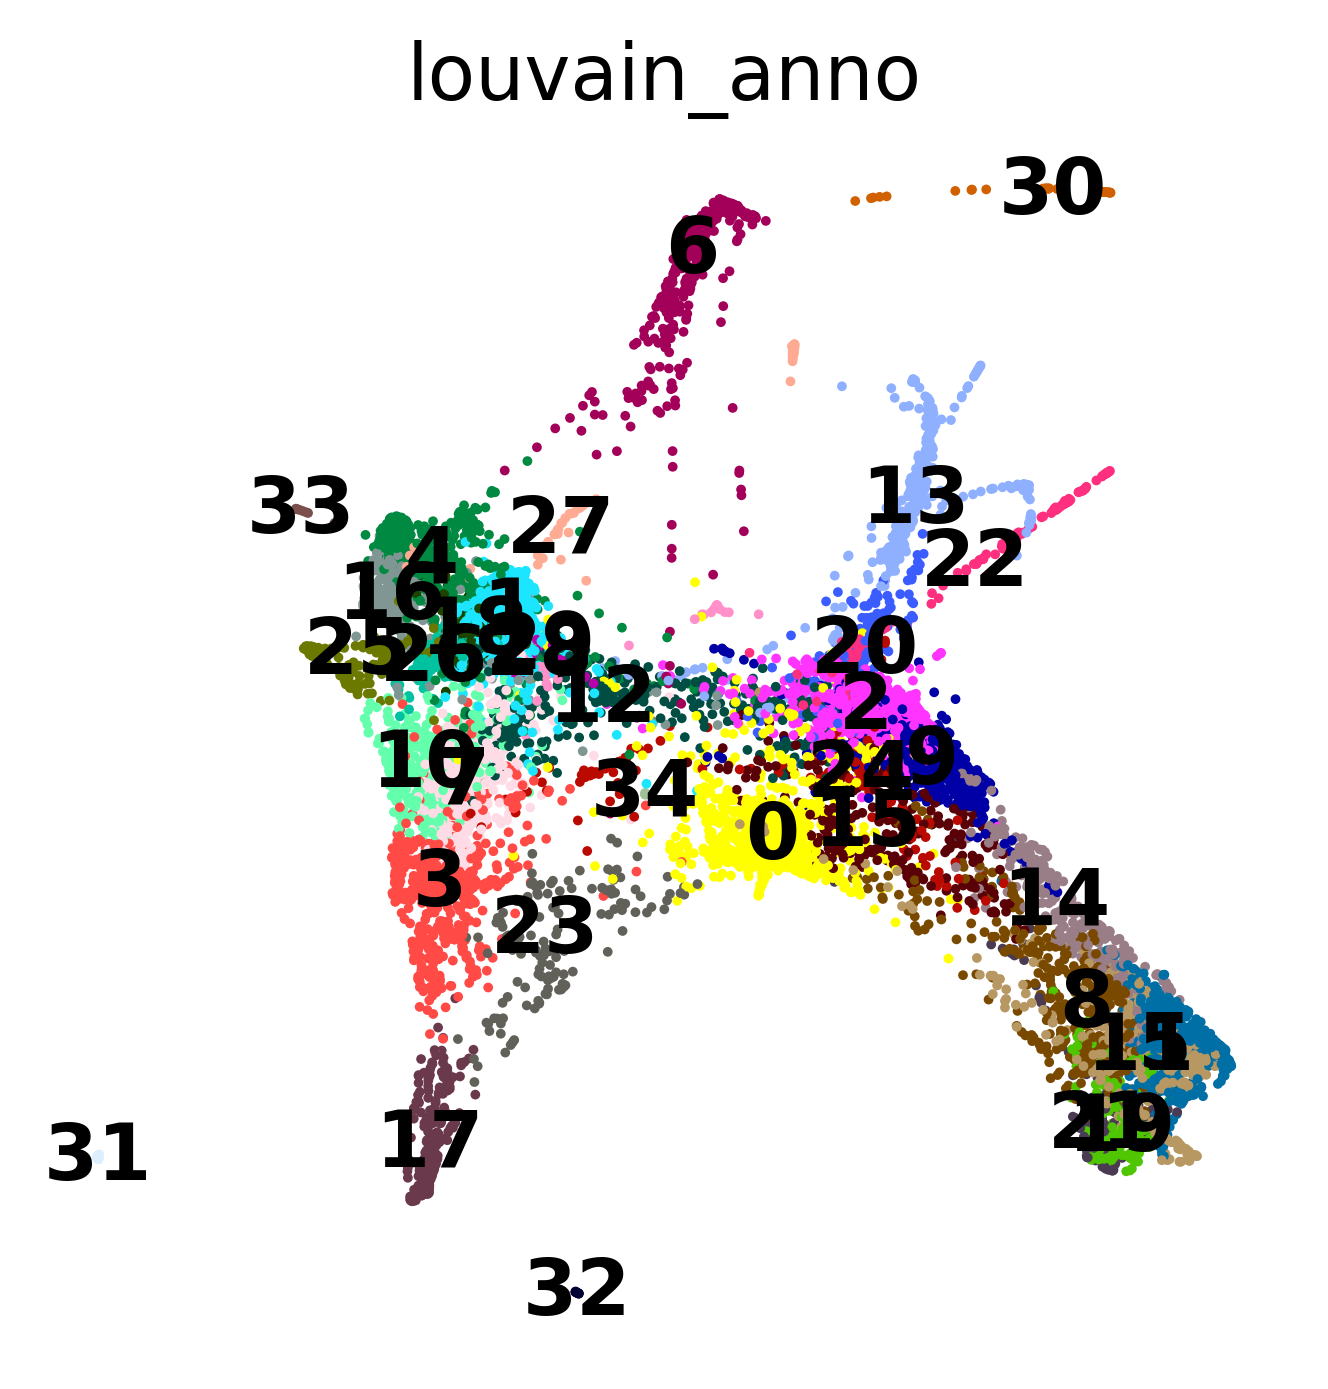

In [53]:
sc.pl.draw_graph(
    adata, color=["louvain_anno"], legend_loc="on data"
)

/usr/local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


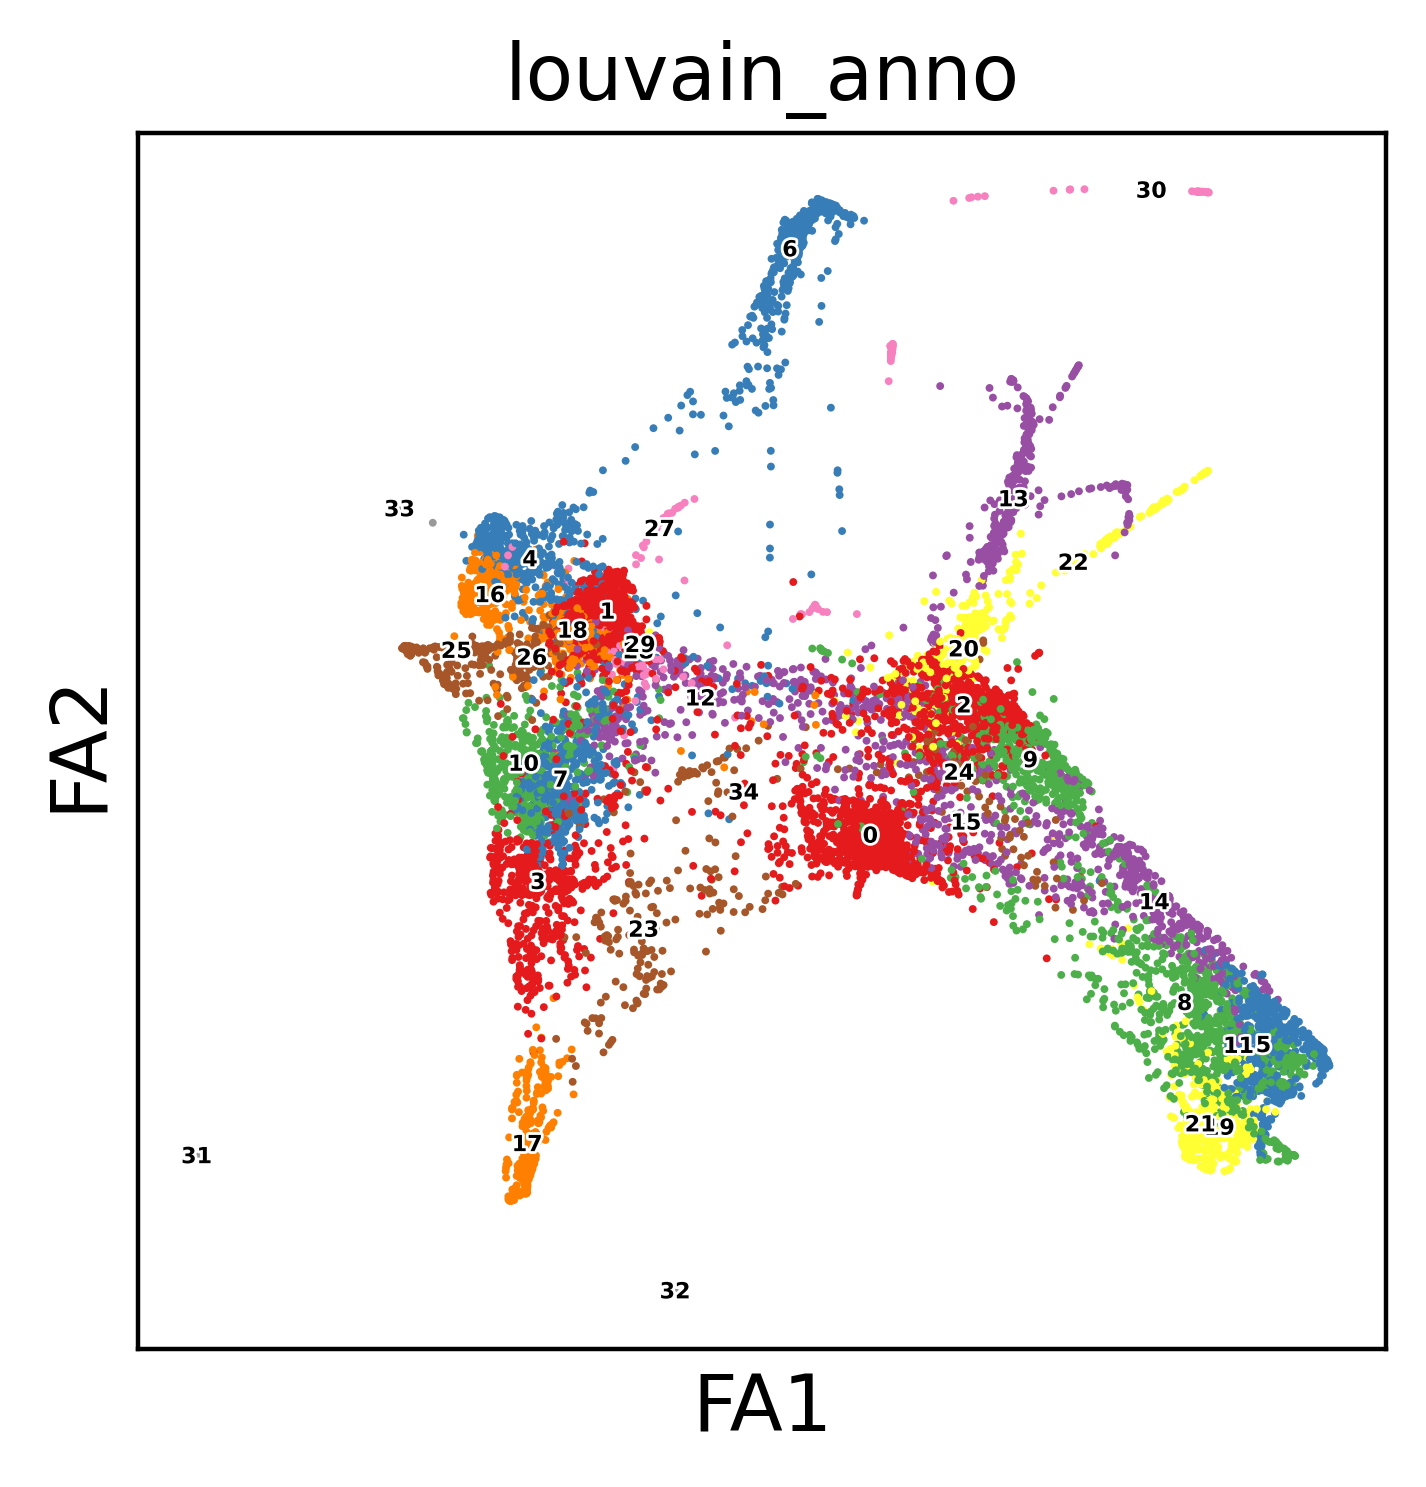

In [54]:
sc.pl.draw_graph(adata, 
                 color=["louvain_anno"], 
                 legend_loc="on data",
                 legend_fontsize=4, 
                 legend_fontoutline=1,
                 size=8, 
                 edges_color='gray', 
                 edges_width=0.1, 
                 palette='Set1',
                 outline_width=0.5,
                 frameon=True
                )

In [100]:
adata.obs

paul15_clusters  n_counts_all louvain louvain_anno
0               7MEP         353.0       8            8
1               15Mo        2556.0       1            1
2               3Ery        4649.0      17           17
3               15Mo        4486.0       2            2
4               3Ery        5205.0      17           17
...              ...           ...     ...          ...
2725            2Ery        4873.0       6            6
2726          13Baso        3553.0      24           24
2727            7MEP         443.0       8            8
2728            15Mo        3252.0       2            2
2729            3Ery        6401.0       3            3

[2730 rows x 4 columns]

In [101]:
adata.obs["louvain_anno"].cat.rename_categories(new_categories)

0           8
1           1
2          17
3           2
4          17
        ...  
2725        6
2726    24/Mo
2727        8
2728        2
2729        3
Name: louvain_anno, Length: 2730, dtype: category
Categories (25, object): ['0', '1', '2', '3', ..., '21', '22/Baso', '23', '24/Mo']

In [103]:
adata.obs['louvain_anno'] = adata.obs["louvain_anno"].cat.rename_categories(new_categories)

In [104]:
adata.obs

paul15_clusters  n_counts_all louvain louvain_anno
0               7MEP         353.0       8            8
1               15Mo        2556.0       1            1
2               3Ery        4649.0      17           17
3               15Mo        4486.0       2            2
4               3Ery        5205.0      17           17
...              ...           ...     ...          ...
2725            2Ery        4873.0       6            6
2726          13Baso        3553.0      24        24/Mo
2727            7MEP         443.0       8            8
2728            15Mo        3252.0       2            2
2729            3Ery        6401.0       3            3

[2730 rows x 4 columns]